## TASK 01 
`DATA CLEANING:` There are still a lot of duplicates because many products appear in multiple categories. Revisit the pre-processing code so that each product appears only once in the df DataFrame, following these steps:

    - Reduce the Data Frame so that each row represents a unique product
    - Add a new column categories that contains a list of all categories that the product appears in.
    - Keep a item-price column with the original price of the item.



In [65]:
import os
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Directory containing your CSV files
directory = 'waitrose/'

# List to hold all individual DataFrames
dfs = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        # Append the DataFrame to the list
        dfs.append(df)

In [48]:
# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.head(3)

,data-product-id,data-product-name,data-product-type,data-product-on-offer,data-product-index,image-url,product-page,product-name,product-size,item-price,price-per-unit,offer-description,category
0,850323,TENA Lady Pants Plus M,G,True,316.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,save £1.50. Was £8.50,"Toiletries, Health & Beauty"
1,568964,TENA Lady Extra Plus,G,True,111.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra Plus,8s,£2.75,34.4p each,Add 2 for £4.50,"Toiletries, Health & Beauty"
2,462499,TENA Lady Extra,G,True,86.0,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra,10s,£2.75,27.5p each,Add 2 for £4.50,"Toiletries, Health & Beauty"


In [49]:
# Checking Null 
print(f"Number of rows :{len(merged_df)}")
merged_df.isnull().sum()

Number of rows :25418


data-product-id              0
data-product-name            0
data-product-type            0
data-product-on-offer        0
data-product-index          10
image-url                    0
product-page                 0
product-name                11
product-size                55
item-price                  11
price-per-unit             442
offer-description        18217
category                     0
dtype: int64

In [50]:
# Drop duplicates based on all columns
Drop_df = merged_df.drop_duplicates()
print(f"Number of rows :{len(Drop_df)}")


Number of rows :25378


In [51]:
Drop_df = Drop_df.dropna(subset=['product-name', 'item-price','price-per-unit'])

# Fill missing values in 'product-size' with a placeholder
Drop_df['product-size'].fillna('Unknown', inplace=True)

# Optionally, drop the 'offer-description' column if it has too many missing values
Drop_df = Drop_df.drop(columns=['offer-description'])

# Check the missing values again
print(Drop_df.isnull().sum())


data-product-id          0
data-product-name        0
data-product-type        0
data-product-on-offer    0
data-product-index       0
image-url                0
product-page             0
product-name             0
product-size             0
item-price               0
price-per-unit           0
category                 0
dtype: int64


In [52]:
Drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24936 entries, 0 to 25417
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data-product-id        24936 non-null  int64  
 1   data-product-name      24936 non-null  object 
 2   data-product-type      24936 non-null  object 
 3   data-product-on-offer  24936 non-null  bool   
 4   data-product-index     24936 non-null  float64
 5   image-url              24936 non-null  object 
 6   product-page           24936 non-null  object 
 7   product-name           24936 non-null  object 
 8   product-size           24936 non-null  object 
 9   item-price             24936 non-null  object 
 10  price-per-unit         24936 non-null  object 
 11  category               24936 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 2.3+ MB


In [53]:
Drop_df.rename(columns={
    'data-product-id': 'product_id',
    'data-product-name': 'product_name',
    'data-product-type': 'product_type',
    'data-product-on-offer': 'product_on_offer',
    'data-product-index': 'product_index',
    'image-url': 'image_url',
    'product-page': 'product_page',
    'product-name': 'product_name_alt',
    'product-size': 'product_size',
    'item-price': 'item_price',
    'price-per-unit': 'price_per_unit',
    'offer-description': 'offer_description',
    'category': 'category'
}, inplace=True)

In [54]:
Drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24936 entries, 0 to 25417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_id        24936 non-null  int64  
 1   product_name      24936 non-null  object 
 2   product_type      24936 non-null  object 
 3   product_on_offer  24936 non-null  bool   
 4   product_index     24936 non-null  float64
 5   image_url         24936 non-null  object 
 6   product_page      24936 non-null  object 
 7   product_name_alt  24936 non-null  object 
 8   product_size      24936 non-null  object 
 9   item_price        24936 non-null  object 
 10  price_per_unit    24936 non-null  object 
 11  category          24936 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 2.3+ MB


In [55]:
Drop_df = Drop_df.dropna(subset=['product_index'])
Drop_df['product_index'] = Drop_df['product_index'].astype(int)

In [56]:
Drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24936 entries, 0 to 25417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        24936 non-null  int64 
 1   product_name      24936 non-null  object
 2   product_type      24936 non-null  object
 3   product_on_offer  24936 non-null  bool  
 4   product_index     24936 non-null  int64 
 5   image_url         24936 non-null  object
 6   product_page      24936 non-null  object
 7   product_name_alt  24936 non-null  object
 8   product_size      24936 non-null  object
 9   item_price        24936 non-null  object
 10  price_per_unit    24936 non-null  object
 11  category          24936 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 2.3+ MB


In [57]:
unique_products_df = Drop_df.drop_duplicates(subset=['product_id'])
unique_products_df.head(5)

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,category
0,850323,TENA Lady Pants Plus M,G,True,316,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,"Toiletries, Health & Beauty"
1,568964,TENA Lady Extra Plus,G,True,111,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra Plus,8s,£2.75,34.4p each,"Toiletries, Health & Beauty"
2,462499,TENA Lady Extra,G,True,86,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra,10s,£2.75,27.5p each,"Toiletries, Health & Beauty"
3,873282,Essential Oval Paracetamol Tablets,G,False,4,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,Essential Oval Paracetamol Tablets,16s,60p,3.8p each,"Toiletries, Health & Beauty"
4,879894,essential Waitrose Soft White Tissues,G,False,5,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/essenti...,essential Waitrose Soft White Tissues,96 sheets,£1.40,14.6p/10 sheets,"Toiletries, Health & Beauty"


In [58]:
# Group by 'data-product-id' and aggregate 'category' into a list
grouped = Drop_df.groupby('product_id')['category'].apply(list).reset_index()

# Merge the aggregated categories back to the original DataFrame
Drop_df = pd.merge(Drop_df, grouped, on='product_id', how='left')
Drop_df.head(3)

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,category_x,category_y
0,850323,TENA Lady Pants Plus M,G,True,316,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"
1,568964,TENA Lady Extra Plus,G,True,111,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra Plus,8s,£2.75,34.4p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"
2,462499,TENA Lady Extra,G,True,86,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra,10s,£2.75,27.5p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"


In [59]:
# Rename the new column to 'categories'
Drop_df.rename(columns={'category_y': 'categories'}, inplace=True)
Drop_df.head(3)

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,category_x,categories
0,850323,TENA Lady Pants Plus M,G,True,316,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"
1,568964,TENA Lady Extra Plus,G,True,111,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra Plus,8s,£2.75,34.4p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"
2,462499,TENA Lady Extra,G,True,86,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra,10s,£2.75,27.5p each,"Toiletries, Health & Beauty","[Toiletries, Health & Beauty]"


In [60]:
# Drop the original 'category_x' column if needed
Drop_df.drop(columns=['category_x'], inplace=True)

# Display the updated DataFrame
Drop_df.head(3)

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,categories
0,850323,TENA Lady Pants Plus M,G,True,316,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Pants Plus M,9s,£7.00,77.8p each,"[Toiletries, Health & Beauty]"
1,568964,TENA Lady Extra Plus,G,True,111,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra Plus,8s,£2.75,34.4p each,"[Toiletries, Health & Beauty]"
2,462499,TENA Lady Extra,G,True,86,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/tena-la...,TENA Lady Extra,10s,£2.75,27.5p each,"[Toiletries, Health & Beauty]"


In [61]:
Drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24936 entries, 0 to 24935
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        24936 non-null  int64 
 1   product_name      24936 non-null  object
 2   product_type      24936 non-null  object
 3   product_on_offer  24936 non-null  bool  
 4   product_index     24936 non-null  int64 
 5   image_url         24936 non-null  object
 6   product_page      24936 non-null  object
 7   product_name_alt  24936 non-null  object
 8   product_size      24936 non-null  object
 9   item_price        24936 non-null  object
 10  price_per_unit    24936 non-null  object
 11  categories        24936 non-null  object
dtypes: bool(1), int64(2), object(9)
memory usage: 2.1+ MB


## TASK 02 
`COMPARATIVE ANALYSIS:` From the plot in 📅 Week 01 – Day 04, we learned that the supermarket’s own brand (‘Everyday Value’) contains the cheapest products in the dataset. Your goal is to create at least 2 data visualizations with an analysis of how the products in this category compare to their equivalent branded ones in other categories within the dataset.


In [69]:
# Assuming df contains your dataset with products
# Subset for 'Everyday Value' and branded products
everyday_value = Drop_df[Drop_df['product_name_alt'].str.contains('Health')]
everyday_value

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,categories
598,948208,Sanex Expert Skin Health Therapy Shower & Bath...,G,True,610,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/sanex-e...,Sanex Expert Skin Health Therapy Shower & Bath...,450ml,£3.00,66.7p/100ml,"[Toiletries, Health & Beauty, New]"
680,885319,Together Health Magnesium Capsules 5 Natural F...,G,True,697,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/togethe...,Together Health Magnesium Capsules 5 Natural F...,30Each,£5.25,17.5p each,"[Toiletries, Health & Beauty]"
720,879345,Together Health Wholefood Iron With B-Vitamins...,G,True,737,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/togethe...,Together Health Wholefood Iron With B-Vitamins...,30Each,£6.00,20p each,"[Toiletries, Health & Beauty]"
1018,797899,Health & Her Menopause Capsules,G,False,1042,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/health-...,Health & Her Menopause Capsules,60s,£21.00,35p each,"[Toiletries, Health & Beauty]"
1024,797510,Together Health Vitamin D3 Capsules Natural Ve...,G,True,1048,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/togethe...,Together Health Vitamin D3 Capsules Natural Ve...,30Each,£5.25,17.5p each,"[Toiletries, Health & Beauty]"
...,...,...,...,...,...,...,...,...,...,...,...,...
21476,776706,Rude Health Crunchy Almond Granola,G,True,2897,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rude-he...,Rude Health Crunchy Almond Granola,400g,£2.45,61.3p/100g,"[Food Cupboard, Dietary & Lifestyle]"
21527,715064,Waitrose Gut Health Fruit Juice Shot,G,False,2948,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/waitros...,Waitrose Gut Health Fruit Juice Shot,100ml,£1.60,£1.60/100ml,"[Fresh & Chilled, Dietary & Lifestyle]"
21553,689751,Rude Health Almond & Hazelnut Granola,G,True,2974,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rude-he...,Rude Health Almond & Hazelnut Granola,400g,£2.45,61.3p/100g,"[Food Cupboard, Dietary & Lifestyle]"
21588,657872,Rude Health 5 Grain 5 Seed Porridge,G,True,3009,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rude-he...,Rude Health 5 Grain 5 Seed Porridge,400g,£2.05,51.3p/100g,"[Food Cupboard, Dietary & Lifestyle]"


In [71]:
branded_products = Drop_df[Drop_df['product_name_alt'].str.contains('Health')]
branded_products

,product_id,product_name,product_type,product_on_offer,product_index,image_url,product_page,product_name_alt,product_size,item_price,price_per_unit,categories
598,948208,Sanex Expert Skin Health Therapy Shower & Bath...,G,True,610,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/sanex-e...,Sanex Expert Skin Health Therapy Shower & Bath...,450ml,£3.00,66.7p/100ml,"[Toiletries, Health & Beauty, New]"
680,885319,Together Health Magnesium Capsules 5 Natural F...,G,True,697,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/togethe...,Together Health Magnesium Capsules 5 Natural F...,30Each,£5.25,17.5p each,"[Toiletries, Health & Beauty]"
720,879345,Together Health Wholefood Iron With B-Vitamins...,G,True,737,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/togethe...,Together Health Wholefood Iron With B-Vitamins...,30Each,£6.00,20p each,"[Toiletries, Health & Beauty]"
1018,797899,Health & Her Menopause Capsules,G,False,1042,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/health-...,Health & Her Menopause Capsules,60s,£21.00,35p each,"[Toiletries, Health & Beauty]"
1024,797510,Together Health Vitamin D3 Capsules Natural Ve...,G,True,1048,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/togethe...,Together Health Vitamin D3 Capsules Natural Ve...,30Each,£5.25,17.5p each,"[Toiletries, Health & Beauty]"
...,...,...,...,...,...,...,...,...,...,...,...,...
21476,776706,Rude Health Crunchy Almond Granola,G,True,2897,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rude-he...,Rude Health Crunchy Almond Granola,400g,£2.45,61.3p/100g,"[Food Cupboard, Dietary & Lifestyle]"
21527,715064,Waitrose Gut Health Fruit Juice Shot,G,False,2948,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/waitros...,Waitrose Gut Health Fruit Juice Shot,100ml,£1.60,£1.60/100ml,"[Fresh & Chilled, Dietary & Lifestyle]"
21553,689751,Rude Health Almond & Hazelnut Granola,G,True,2974,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rude-he...,Rude Health Almond & Hazelnut Granola,400g,£2.45,61.3p/100g,"[Food Cupboard, Dietary & Lifestyle]"
21588,657872,Rude Health 5 Grain 5 Seed Porridge,G,True,3009,https://ecom-su-static-prod.wtrecom.com/images...,https://www.waitrose.com/ecom/products/rude-he...,Rude Health 5 Grain 5 Seed Porridge,400g,£2.05,51.3p/100g,"[Food Cupboard, Dietary & Lifestyle]"


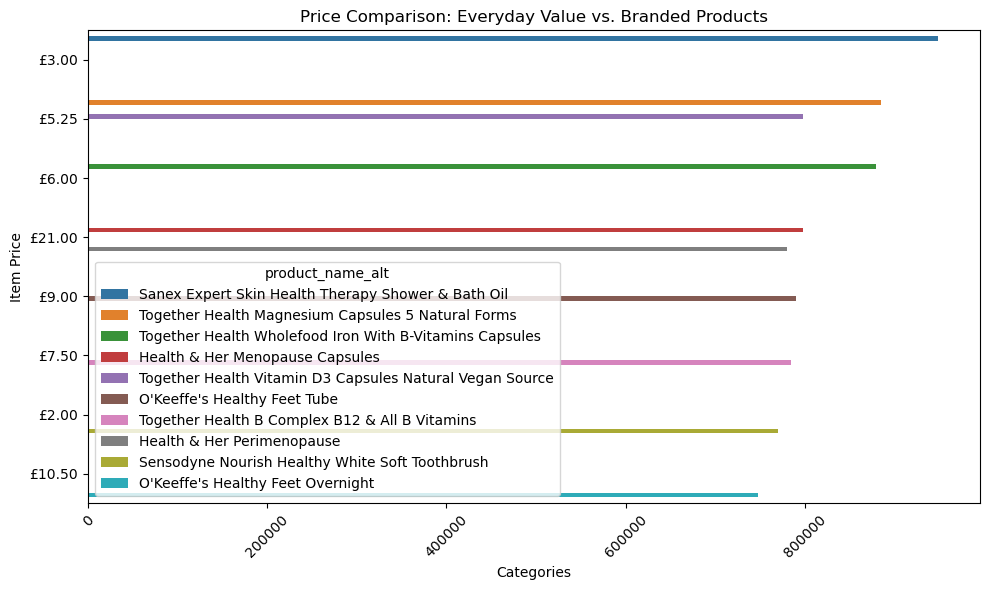

In [76]:
# Visualization 1: Price Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='product_id', y='item_price', hue='product_name_alt', data=everyday_value[:10])
plt.title('Price Comparison: Everyday Value vs. Branded Products')
plt.xlabel('Categories')
plt.ylabel('Item Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

